## About Dataset

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer need Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like 
- Customer ID, 
- age: age in years
- sex : 0: male,  1: female 
- income: 0: other/unknown,  1: high school,  2: university,  3: graduate school
- marita status, 0: single,  1: non-single (divorced, separated, married, widowed)
- occupation: 0: unemployed/unskilled, 1: skilled employee/official, 2: management/self-employed/highly qualified employed/officer

- settlement size: 0: small city, 1: mid-sized city, 2: big city
- Education: 0: other/unknown, 1: high school, 2: university, 3: graduate school

through which we can easily fit our model for better prediction.



## Goal/objective

The goal of the project is to 📊 explore data (EDA Analysis), 👯‍♀️ perform clustering using different models, and 🔎 compare models to find out best model for customer segmentation.
I want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Load Data

In [1]:

## Data ## 
import pandas as pd 
import numpy as np 
import math

## Visualization ## 
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly.subplots import make_subplots 
import plotly.express as px
import plotly.graph_objects as go 
import matplotlib.cm as cm

## Preprocessing ## 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

## Cluster Modelling ## 
from scipy import stats
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN

In [2]:
df = pd.read_csv('C:\\Users\\USER\Desktop\\segmentation data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.shape

(2000, 8)

In [6]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#### Any missing/ duplicated values

In [7]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=["ID"], inplace=True)

In [10]:
# numerical cols
num_cols = ["Age", "Income"]

In [11]:
# categorical cols
cat_cols = ["Sex", "Marital status", "Education", "Occupation", "Settlement size"]

# convert to string for now as it eases EDA
df[cat_cols] = df[cat_cols].astype(str)

## Visualizations

In [12]:
figure_size=(8, 6)

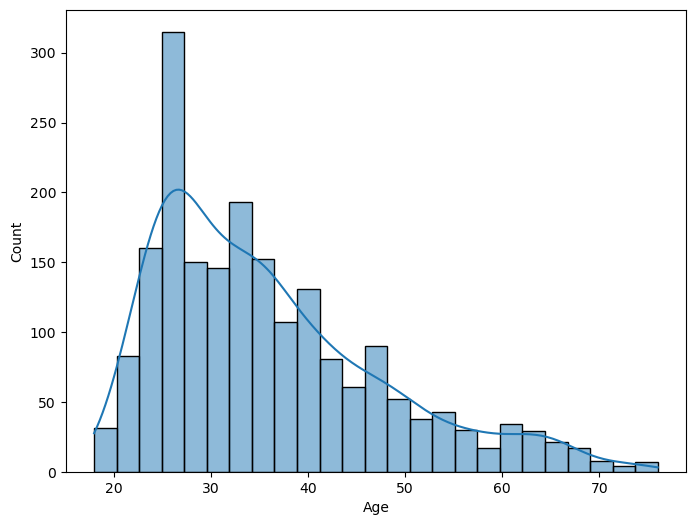

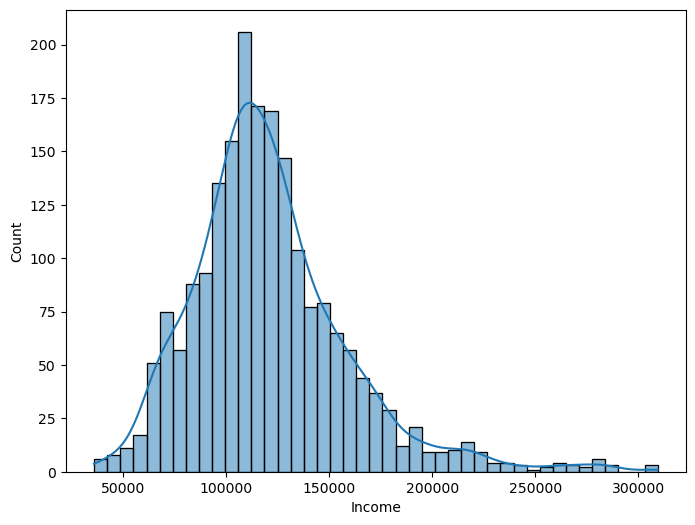

In [13]:
for num_col in num_cols:
    fig, axs = plt.subplots(figsize=figure_size)
    sns.histplot(df, x=num_col, kde=True)
    plt.show()


Conclusions:

- Both distributions are right-skewed, age much more so than income.
- Nothing unexpected.

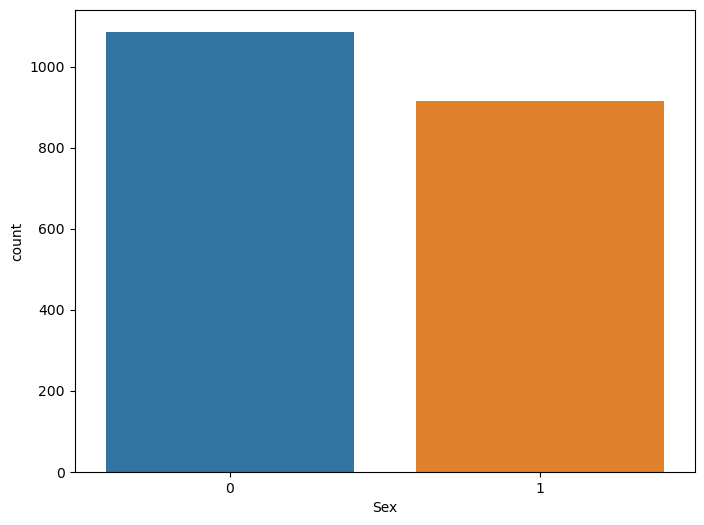

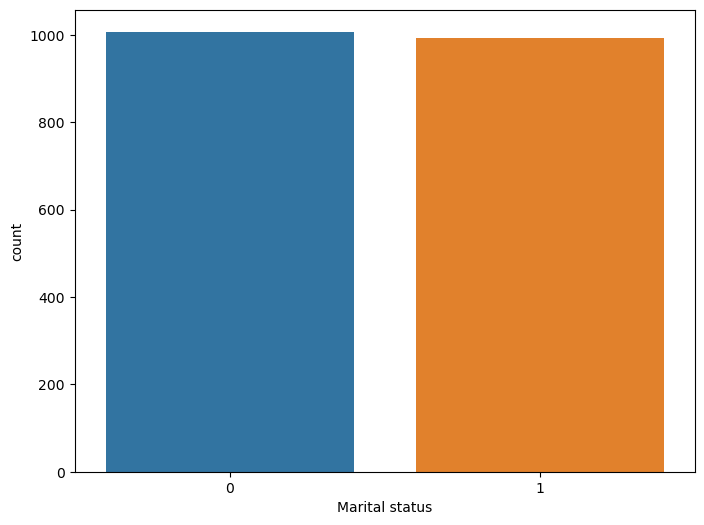

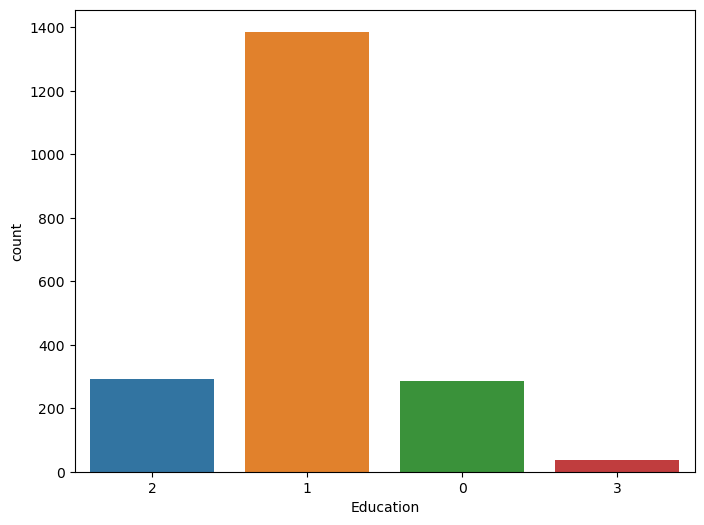

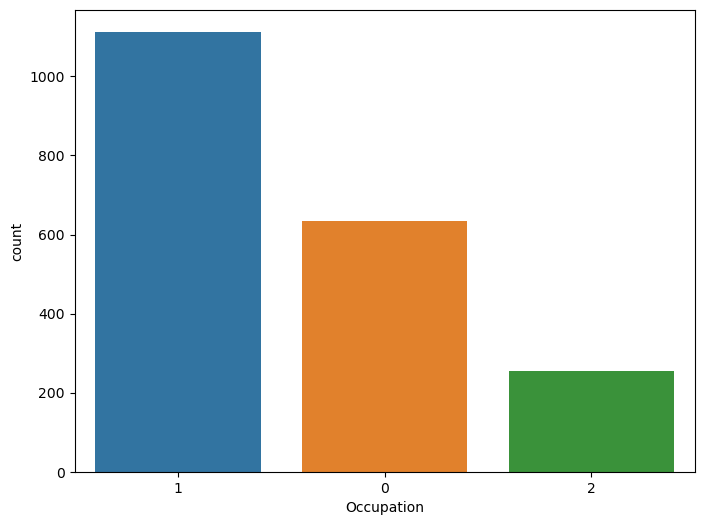

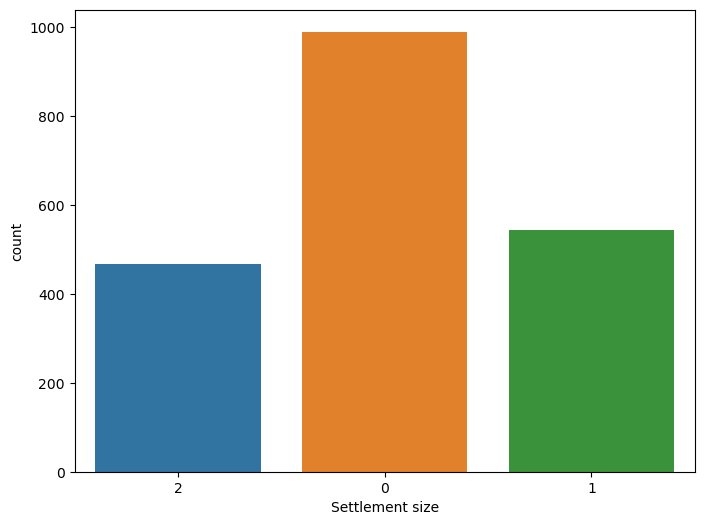

In [14]:
for col in cat_cols:
    fig, axs = plt.subplots(figsize=figure_size)
    sns.countplot(data=df, x=col)
    plt.show()

In [15]:
# convert categorical columns back from string to integer

df[cat_cols] = df[cat_cols].astype(int)

## CLUSTERING
I am going to be considering Four different clusters namely:
- k means Clustering
- Hierarhical Clustering
- DBSCAN
- Mean Shift Clustering

## k- means Clustering

In [16]:
data_km = df.copy()
data_km

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [17]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_km = scaler.fit_transform(data_km)
scaled_data_km

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

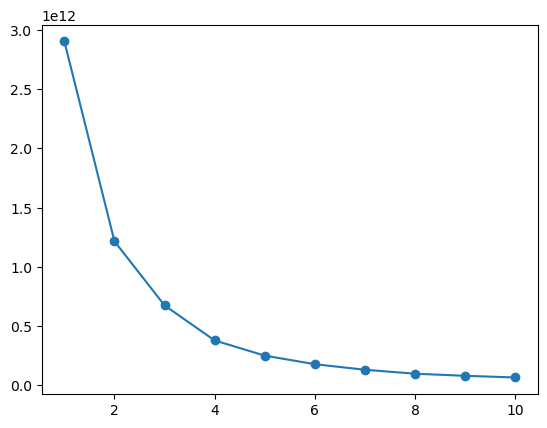

In [18]:
# Apply the "Elbow Method" to find the optimal clusters number
interia = []
for k in range(1, 11):
    km = KMeans(k, n_init=10)
    km.fit(data_km)
    interia.append(km.inertia_)
plt.plot(range(1, 11), interia, marker='o')

## Elbow Method

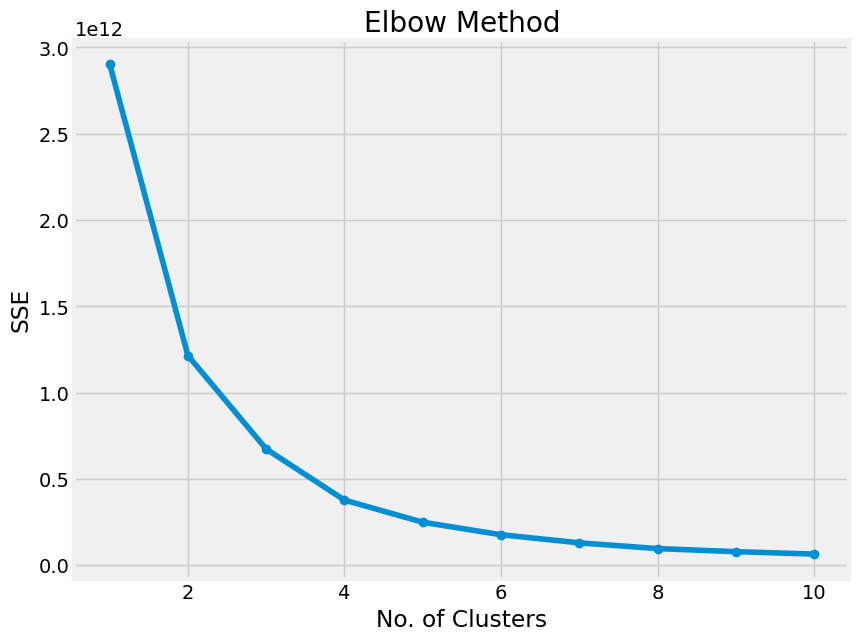

In [19]:
plt.figure(figsize=(10,7))
SSE = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(df)
  SSE.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),SSE , marker = "o")
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE")
plt.show()

I am going to consider three different cluster numbers and see how they perform

In [20]:
#Build Cluster algorithm
km= KMeans(n_clusters=4,n_init=10)
km.fit(data_km)

KMeans(n_clusters=4)

In [21]:
#saving the clusters 
y_km = km.fit_predict(data_km)
y_km

array([1, 2, 3, ..., 3, 1, 3])

In [22]:
km.labels_

array([1, 2, 3, ..., 3, 1, 3])

In [23]:
# The lowest SSE value
km.inertia_

377123889580.85547

In [24]:
# The number of iterations required to converge
km.n_iter_

8

In [25]:
score = silhouette_score(data_km, km.labels_ )
score

0.5428531732146846

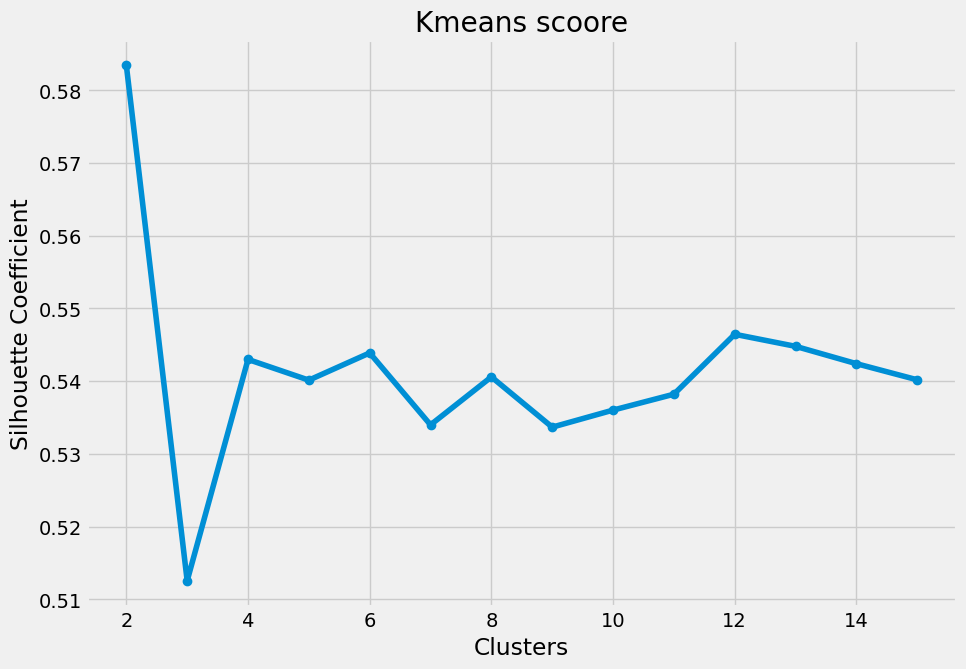

In [44]:
plt.figure(figsize=(10,7))
kmean_scores = []
kmean_index = range(2, 16)
for i in kmean_index:
  kmeans = KMeans(n_clusters=i)
  labels = kmeans.fit_predict(data_km)
  kmean_scores.append(silhouette_score(data_km, labels))

plt.style.use("fivethirtyeight")
plt.plot(kmean_index,kmean_scores , marker = "o")
plt.title("Kmeans scoore")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

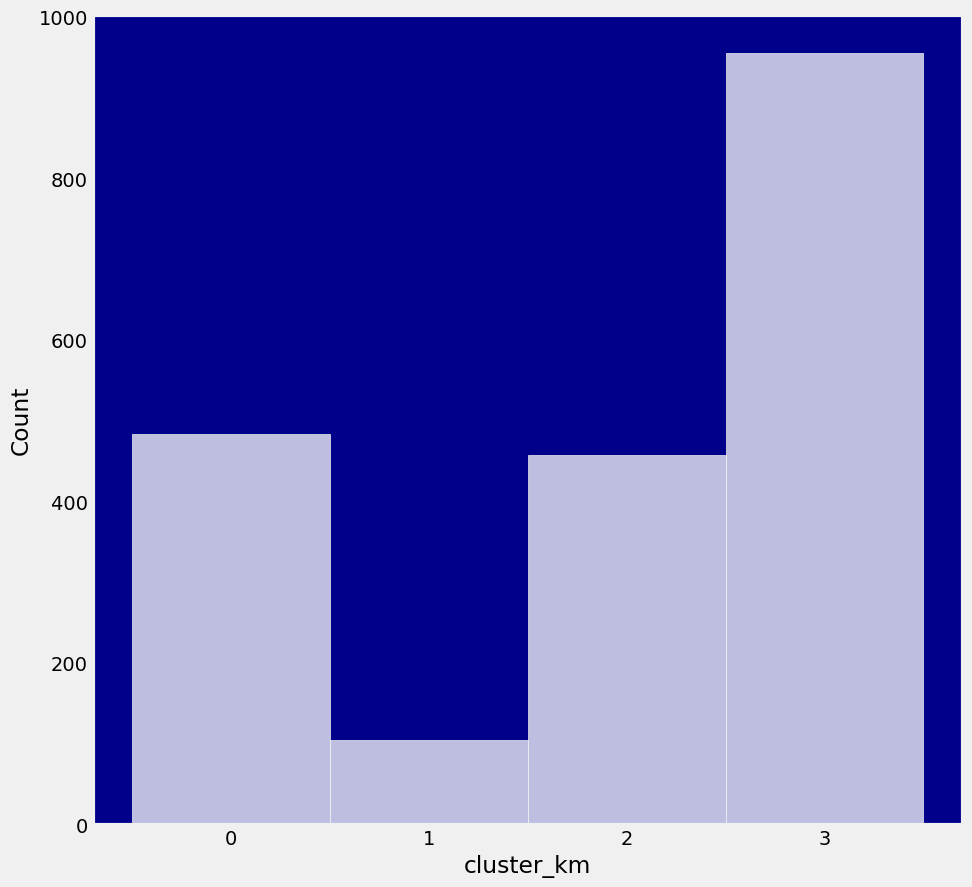

In [45]:
data_km['cluster_km'] = y_km
data_km.cluster_km = data_km.cluster_km.astype(str)
data_km = data_km.sort_values("cluster_km")

plt.figure(figsize=(10,10))
plt.axes(facecolor='darkblue')
sns.histplot(data_km.cluster_km, color = "white")
plt.grid()
plt.show()

In [26]:
data_km["cluster3"] = km.labels_

# sanity check
data_km.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


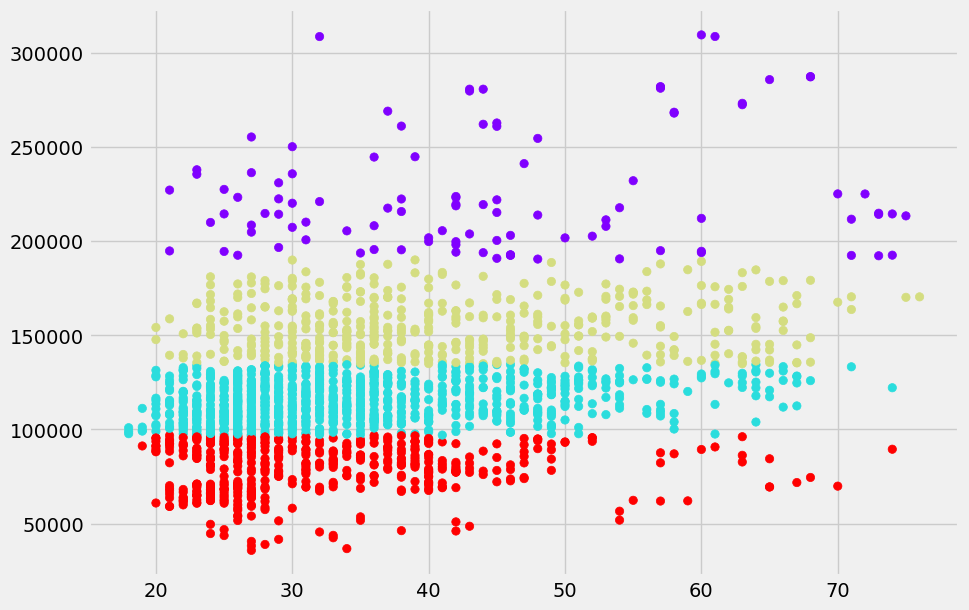

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(data_km['Age'],data_km['Income'],c=km.labels_,cmap='rainbow')

## Analyze customers belonging to the same clusters

In [28]:
data_km[data_km['cluster3']==0]


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
7,0,0,35,1,193621,2,1,0
18,1,1,44,2,261952,2,2,0
56,0,0,52,1,202575,2,2,0
63,0,0,25,0,227385,1,2,0
87,0,0,47,1,241068,1,1,0
...,...,...,...,...,...,...,...,...
1090,0,0,71,2,192360,2,1,0
1092,1,1,45,2,260847,2,2,0
1093,0,0,65,2,285647,2,2,0
1097,0,0,57,2,281647,2,1,0


In [29]:
data_km[data_km['cluster3']==0].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0
mean,0.281553,0.398058,44.786408,1.349515,225808.271845,1.776699,1.475728,0.0
std,0.451956,0.491891,14.686696,0.788505,31676.412888,0.418495,0.623788,0.0
min,0.000000,0.000000,21.000000,0.000000,190413.000000,1.000000,0.000000,0.0
25%,0.000000,0.000000,32.000000,1.000000,201138.500000,2.000000,1.000000,0.0
50%,0.000000,0.000000,43.000000,1.000000,215150.000000,2.000000,2.000000,0.0
75%,1.000000,1.000000,56.000000,2.000000,242804.500000,2.000000,2.000000,0.0
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,0.0


In [30]:
data_km[data_km['cluster3']==1]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
0,0,0,67,2,124670,1,2,1
10,1,1,25,1,108469,1,0,1
11,1,1,24,1,127596,1,0,1
12,1,1,22,1,108687,1,2,1
14,1,1,28,1,102899,1,1,1
...,...,...,...,...,...,...,...,...
1992,1,0,51,1,101074,0,0,1
1994,0,0,45,1,113414,1,0,1
1995,1,0,47,1,123525,0,0,1
1996,1,1,27,1,117744,1,0,1


In [31]:
data_km[data_km['cluster3']==1].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.0
mean,0.505759,0.527749,34.439791,1.003141,114869.657592,0.828272,0.714136,1.0
std,0.500229,0.499491,10.667221,0.538838,10215.359701,0.443727,0.800261,0.0
min,0.000000,0.000000,18.000000,0.000000,97006.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,26.000000,1.000000,106681.500000,1.000000,0.000000,1.0
50%,1.000000,1.000000,32.000000,1.000000,114254.000000,1.000000,0.000000,1.0
75%,1.000000,1.000000,40.000000,1.000000,123633.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,74.000000,3.000000,134467.000000,2.000000,2.000000,1.0


In [32]:
data_km[data_km['cluster3']==2]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
1,1,1,22,1,150773,1,2,2
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2
5,0,0,35,1,144848,0,0,2
6,0,0,53,1,156495,1,1,2
...,...,...,...,...,...,...,...,...
1550,1,1,37,1,145140,1,1,2
1583,1,1,31,1,138307,1,1,2
1592,1,1,44,2,143343,1,1,2
1594,1,0,33,1,138525,1,1,2


In [33]:
data_km[data_km['cluster3']==2].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.0
mean,0.304158,0.435449,40.912473,1.192560,154393.433260,1.249453,1.234136,2.0
std,0.460554,0.496359,12.398049,0.677092,14127.053859,0.568860,0.694508,0.0
min,0.000000,0.000000,20.000000,0.000000,134794.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,31.000000,1.000000,142305.000000,1.000000,1.000000,2.0
50%,0.000000,0.000000,38.000000,1.000000,152302.000000,1.000000,1.000000,2.0
75%,1.000000,1.000000,50.000000,2.000000,165230.000000,2.000000,2.000000,2.0
max,1.000000,1.000000,76.000000,3.000000,189963.000000,2.000000,2.000000,2.0


In [34]:
data_km[data_km['cluster3']==3]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
2,0,0,49,1,89210,0,0,3
13,0,0,60,2,89374,0,0,3
15,1,1,32,1,88428,0,0,3
22,0,0,48,1,89804,0,0,3
25,0,0,36,1,71909,0,0,3
...,...,...,...,...,...,...,...,...
1987,0,0,25,0,66628,0,0,3
1990,1,1,31,1,78758,0,0,3
1993,1,0,38,1,87670,0,0,3
1997,0,0,31,0,86400,0,0,3


In [35]:
data_km[data_km['cluster3']==3].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster3
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.0
mean,0.542268,0.513402,32.202062,0.894845,79159.307216,0.156701,0.164948,3.0
std,0.498725,0.500336,9.708371,0.533267,13191.019613,0.380546,0.499595,0.0
min,0.000000,0.000000,19.000000,0.000000,35832.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,25.000000,1.000000,69419.000000,0.000000,0.000000,3.0
50%,1.000000,1.000000,29.000000,1.000000,81807.000000,0.000000,0.000000,3.0
75%,1.000000,1.000000,38.000000,1.000000,89914.000000,0.000000,0.000000,3.0
max,1.000000,1.000000,74.000000,3.000000,96961.000000,2.000000,2.000000,3.0


#### Analysis and conclussion

We can see from the different we got using our descriptive analysis. we saw the different results that belong to different result. For instance The minimimum income for people belonging to cluster 3 is 36760 and maximum income is 139468 which implies that people that earn between those two figures will be selected based on cluster 3. The analysis has been shown above. The score is 0.54 tending to 1 which means its a good prediction.

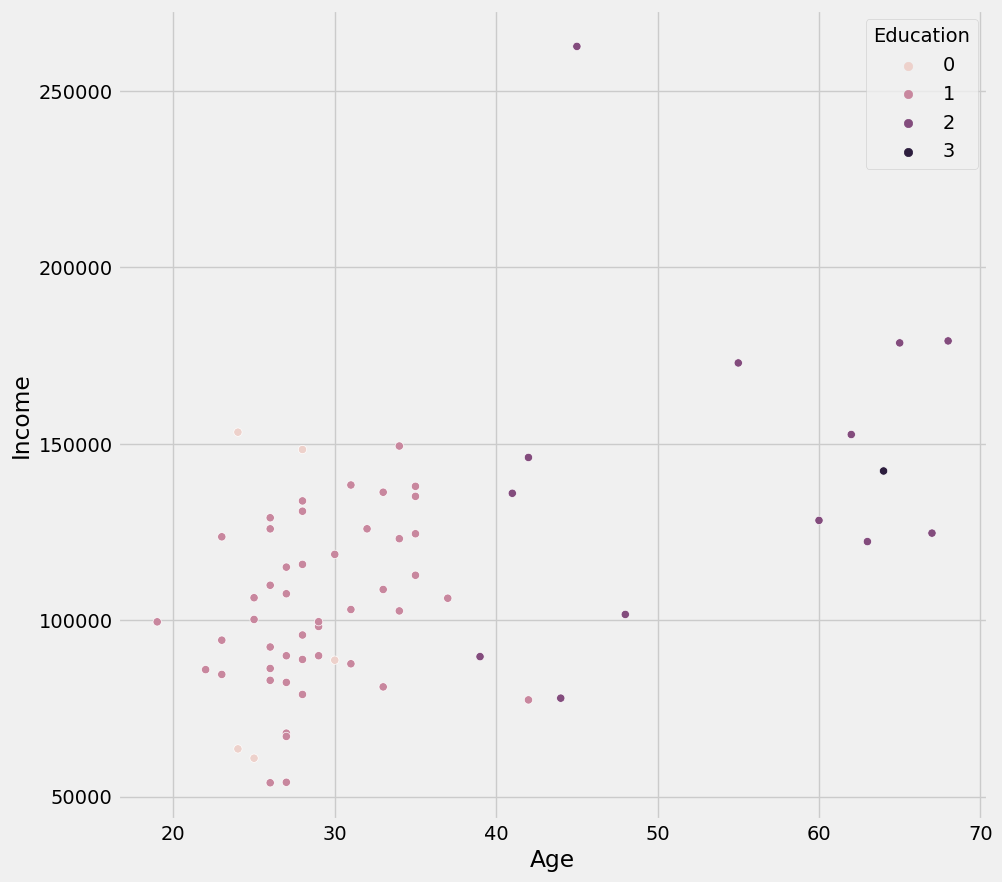

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_km[data_km['cluster3']==2], x="Age",y='Income', hue='Education')
plt.show()

# Future Improvements or analysis

We can simply test our results for different means of number of clusters. we can apply our findings with n_clusters= Range(5, 8)
and see the different results we could derive from

# Hierarhical Clustering

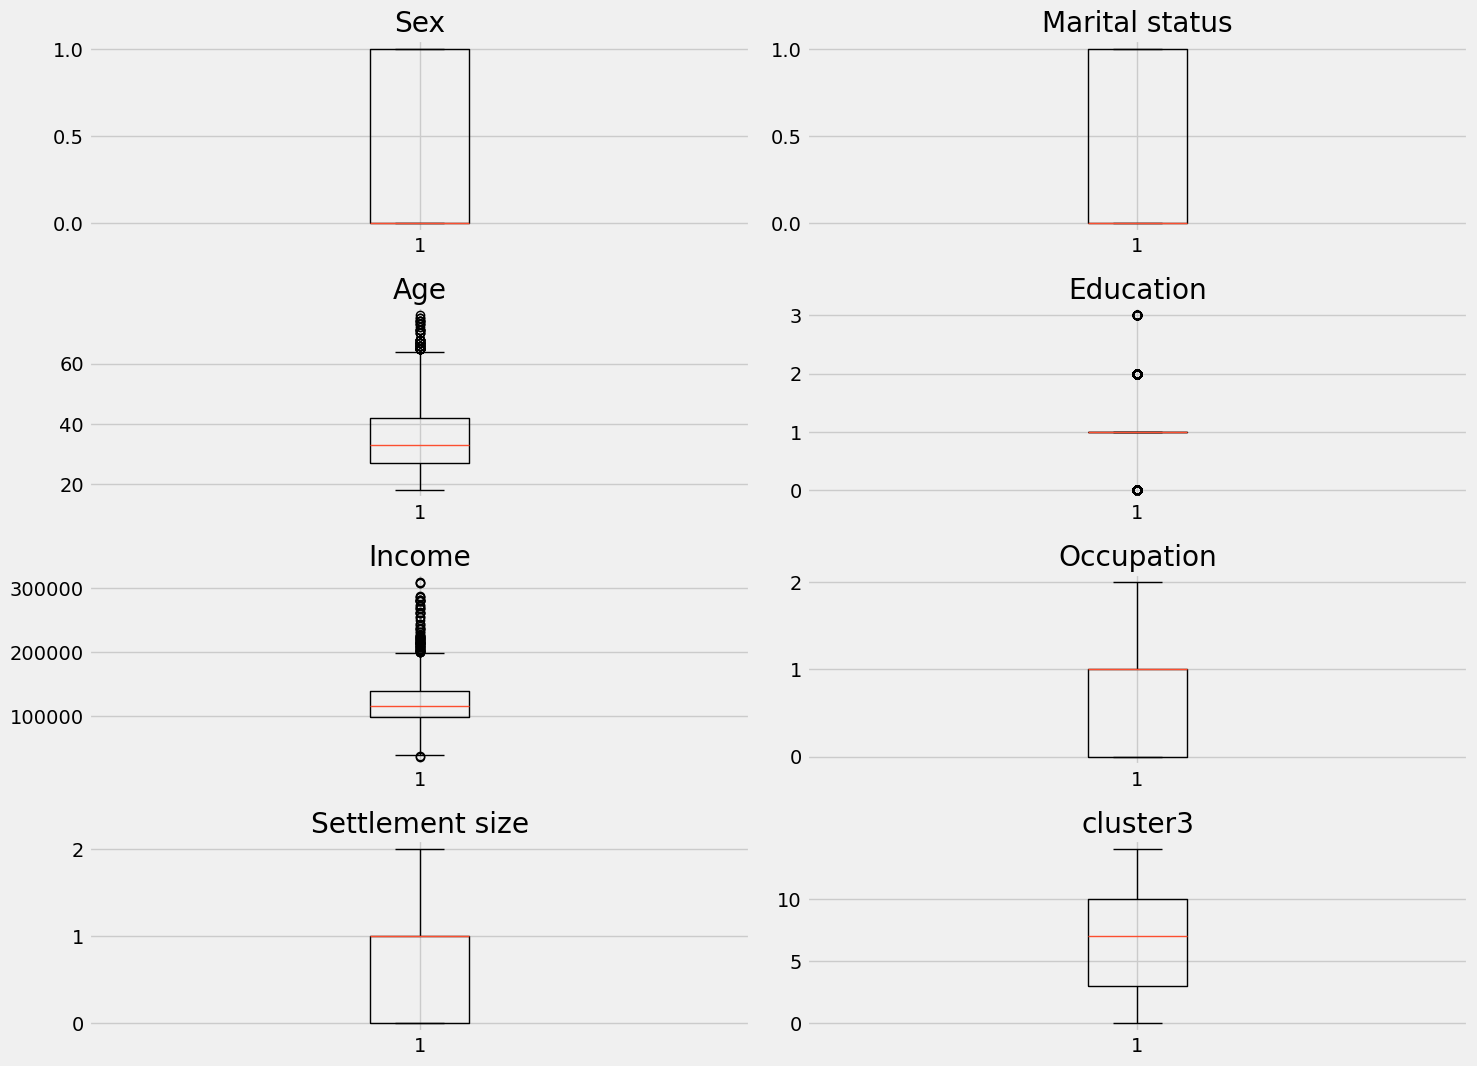

In [43]:
plt.figure(figsize=(15,40))
for i,j in enumerate(df.columns):
  plt.subplot(15,2,i+1)
  plt.boxplot(df[j])
  plt.title(j)
  plt.tight_layout()

In [38]:
# Creating a dataframe to store results
results = pd.DataFrame()
Name = []
Score = []

In [36]:
data_hc= df.copy()

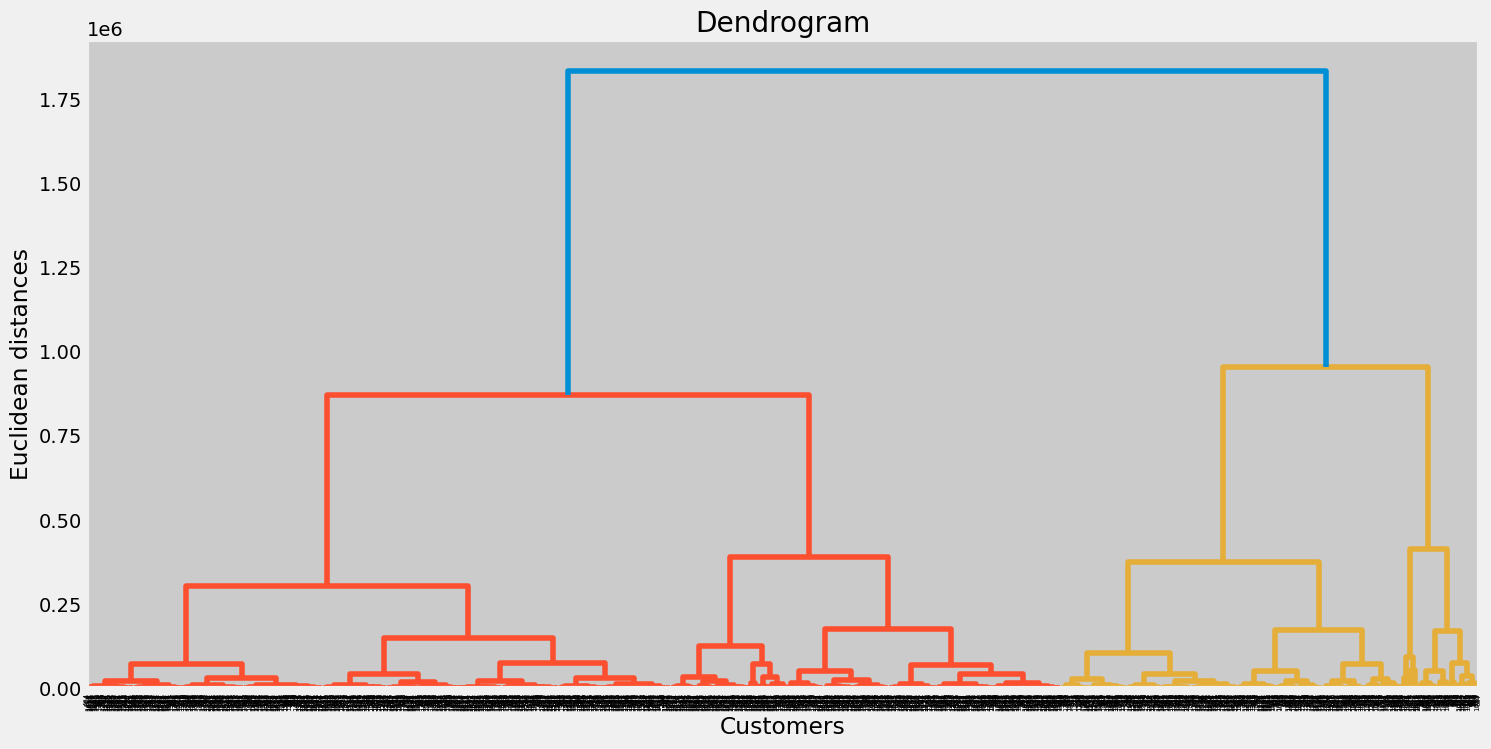

In [61]:
import scipy.cluster.hierarchy as sch
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(data_hc, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [37]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_hc = scaler.fit_transform(data_hc)
scaled_data_hc

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [39]:
hc1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")


In [40]:
kc=hc1.fit(data_hc)

In [41]:
y_hc1 = hc1.fit_predict(data_hc)
y_hc1

array([3, 2, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
clusters = kc.labels_
clusters

array([3, 2, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
data_hc["Clusters_for_Hierarchical"] = y_hc1

In [47]:
score = silhouette_score(data_hc, kc.labels_ )
score

0.5317617705927055

In [48]:
data_hc

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,3
1997,0,0,31,0,86400,0,0,1
1998,1,1,24,1,97968,0,0,1


Silhouette score: 0.529


<AxesSubplot:xlabel='Age', ylabel='Income'>

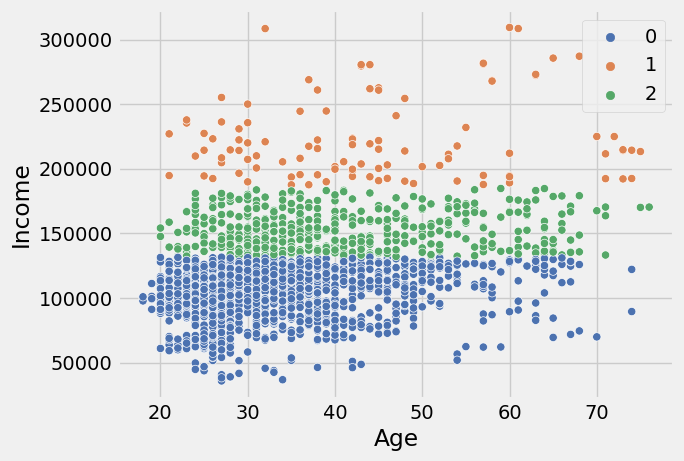

In [49]:
# Visualise the three clusters using Agglomerative Clustering 
AC = AgglomerativeClustering(n_clusters=3) 
AC.fit(df)
score = silhouette_score(df, AC.labels_)
print(f"Silhouette score: {score:0.3f}")
Name.append('Agglomerative Clustering')
Score.append(score)
sns.scatterplot(x=df.Age, y=df.Income, hue=AC.labels_, palette='deep')

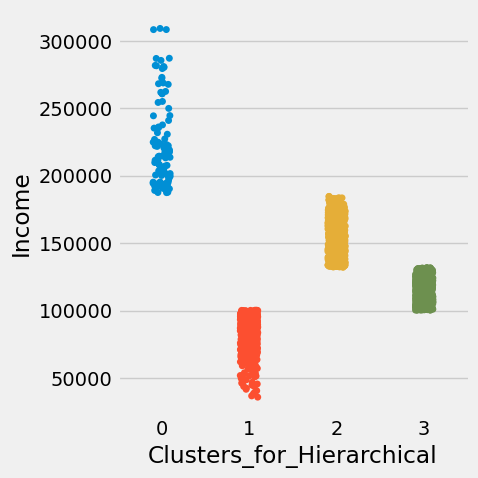

In [50]:
sns.catplot(x = "Clusters_for_Hierarchical", y = "Income", data = data_hc)

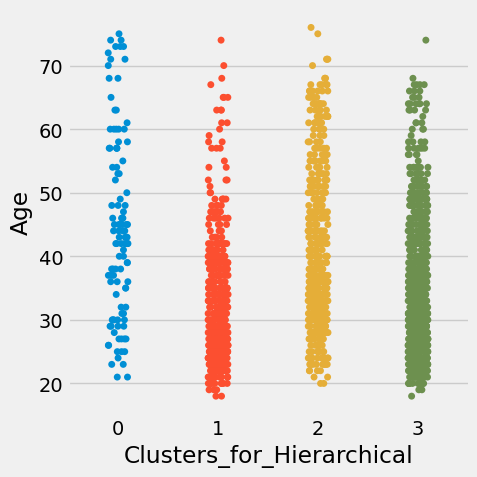

In [51]:
sns.catplot(x = "Clusters_for_Hierarchical", y = "Age", data = data_hc)

### Analysis/ Conclusion

In [52]:
data_hc[data_hc['Clusters_for_Hierarchical']==0]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
7,0,0,35,1,193621,2,1,0
18,1,1,44,2,261952,2,2,0
56,0,0,52,1,202575,2,2,0
63,0,0,25,0,227385,1,2,0
87,0,0,47,1,241068,1,1,0
...,...,...,...,...,...,...,...,...
1090,0,0,71,2,192360,2,1,0
1092,1,1,45,2,260847,2,2,0
1093,0,0,65,2,285647,2,2,0
1097,0,0,57,2,281647,2,1,0


In [53]:
data_hc[data_hc['Clusters_for_Hierarchical']==0].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
count,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0
mean,0.290909,0.40000,44.727273,1.345455,223444.563636,1.745455,1.454545,0.0
std,0.456260,0.49214,14.465339,0.771468,31968.430187,0.437599,0.630077,0.0
min,0.000000,0.00000,21.000000,0.000000,187549.000000,1.000000,0.000000,0.0
25%,0.000000,0.00000,32.500000,1.000000,196933.250000,1.250000,1.000000,0.0
50%,0.000000,0.00000,43.000000,1.000000,214364.000000,2.000000,2.000000,0.0
75%,1.000000,1.00000,56.500000,2.000000,237415.250000,2.000000,2.000000,0.0
max,1.000000,1.00000,75.000000,3.000000,309364.000000,2.000000,2.000000,0.0


In [54]:
data_hc[data_hc['Clusters_for_Hierarchical']==1]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
2,0,0,49,1,89210,0,0,1
13,0,0,60,2,89374,0,0,1
15,1,1,32,1,88428,0,0,1
22,0,0,48,1,89804,0,0,1
25,0,0,36,1,71909,0,0,1
...,...,...,...,...,...,...,...,...
1990,1,1,31,1,78758,0,0,1
1993,1,0,38,1,87670,0,0,1
1997,0,0,31,0,86400,0,0,1
1998,1,1,24,1,97968,0,0,1


In [55]:
data_hc[data_hc['Clusters_for_Hierarchical']==1].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.0
mean,0.558929,0.535714,31.907143,0.898214,81766.741071,0.239286,0.214286,1.0
std,0.496959,0.499169,9.583189,0.520077,13958.018652,0.451465,0.555161,0.0
min,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,25.000000,1.000000,70920.750000,0.000000,0.000000,1.0
50%,1.000000,1.000000,29.000000,1.000000,84596.500000,0.000000,0.000000,1.0
75%,1.000000,1.000000,38.000000,1.000000,93662.500000,0.000000,0.000000,1.0
max,1.000000,1.000000,74.000000,3.000000,100313.000000,2.000000,2.000000,1.0


In [56]:
data_hc[data_hc['Clusters_for_Hierarchical']==2]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
1,1,1,22,1,150773,1,2,2
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2
5,0,0,35,1,144848,0,0,2
6,0,0,53,1,156495,1,1,2
...,...,...,...,...,...,...,...,...
1583,1,1,31,1,138307,1,1,2
1592,1,1,44,2,143343,1,1,2
1594,1,0,33,1,138525,1,1,2
1598,1,1,30,1,140673,1,1,2


In [57]:
data_hc[data_hc['Clusters_for_Hierarchical']==2].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.0
mean,0.311609,0.446029,40.702648,1.193483,152156.739308,1.228106,1.215886,2.0
std,0.463623,0.497586,12.415148,0.703663,14164.072912,0.565058,0.710154,0.0
min,0.000000,0.000000,20.000000,0.000000,132145.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,31.000000,1.000000,139483.500000,1.000000,1.000000,2.0
50%,0.000000,0.000000,37.000000,1.000000,149653.000000,1.000000,1.000000,2.0
75%,1.000000,1.000000,49.000000,2.000000,162799.500000,2.000000,2.000000,2.0
max,1.000000,1.000000,76.000000,3.000000,184753.000000,2.000000,2.000000,2.0


In [58]:
data_hc[data_hc['Clusters_for_Hierarchical']==3]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
0,0,0,67,2,124670,1,2,3
10,1,1,25,1,108469,1,0,3
11,1,1,24,1,127596,1,0,3
12,1,1,22,1,108687,1,2,3
14,1,1,28,1,102899,1,1,3
...,...,...,...,...,...,...,...,...
1991,0,0,54,1,128537,1,0,3
1992,1,0,51,1,101074,0,0,3
1994,0,0,45,1,113414,1,0,3
1995,1,0,47,1,123525,0,0,3


In [59]:
data_hc[data_hc['Clusters_for_Hierarchical']==3].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters_for_Hierarchical
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0
mean,0.495828,0.512515,34.618594,1.000000,115413.113230,0.824791,0.716329,3.0
std,0.500281,0.500141,10.629245,0.519317,8825.368738,0.435923,0.798631,0.0
min,0.000000,0.000000,18.000000,0.000000,100392.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,26.000000,1.000000,107768.000000,1.000000,0.000000,3.0
50%,0.000000,1.000000,32.000000,1.000000,114784.000000,1.000000,0.000000,3.0
75%,1.000000,1.000000,40.000000,1.000000,123198.000000,1.000000,1.000000,3.0
max,1.000000,1.000000,74.000000,3.000000,131842.000000,2.000000,2.000000,3.0


In [60]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
kl.elbow

3

## Analysis/Conclusion

Webcan see that the metric accuracy is lower than that of the k means clustering. Trying different number of clusters yields different result, but the optimum value of accuracy is obtained at k= 4

## Mean shift

In [64]:
data_ms= df.copy()

In [65]:
MS = MeanShift() 

In [66]:
MS.fit(data_ms)

MeanShift()

In [67]:
labeled=MS.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
clusters=MS.predict(data_ms)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Silhouette score: 0.653


<AxesSubplot:xlabel='Age', ylabel='Income'>

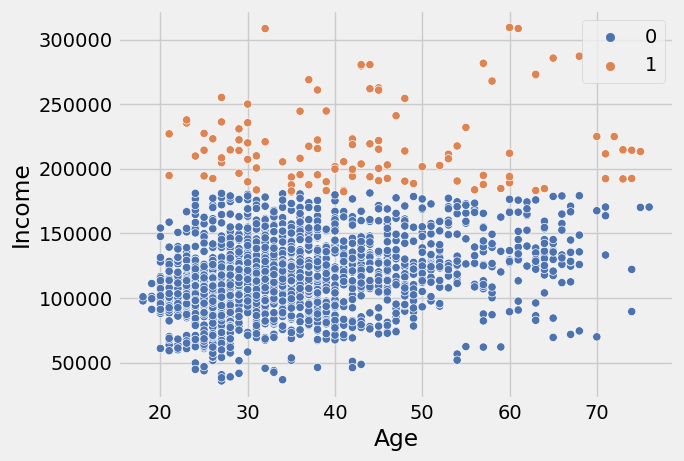

In [70]:
# Visualise the three clusters using Mean Shift 
MS = MeanShift() 
MS.fit(data_ms)
score = silhouette_score(df, MS.labels_)
print(f"Silhouette score: {score:0.3f}")
Name.append('Mean Shift')
Score.append(score)
sns.scatterplot(x=df.Age, y=df.Income, hue=MS.labels_, palette='deep')


## General Conclusion

using the metric accuracy of Silhouette score, we see that Means shift has the highest score with 0.653. Hence Mean shift will be adopted for prediction.

We can improve our model by choosing a different number of cluster. Using different cluster will yield different result.
Thank you

